In [23]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import json

In [24]:
%matplotlib inline

In [25]:
path = "../Data/Growth_data/initial_tolerance_tests/Initial_tolerance_data_frame.tsv"
df = pd.read_csv(path, sep="\t")

## Initial toxicity

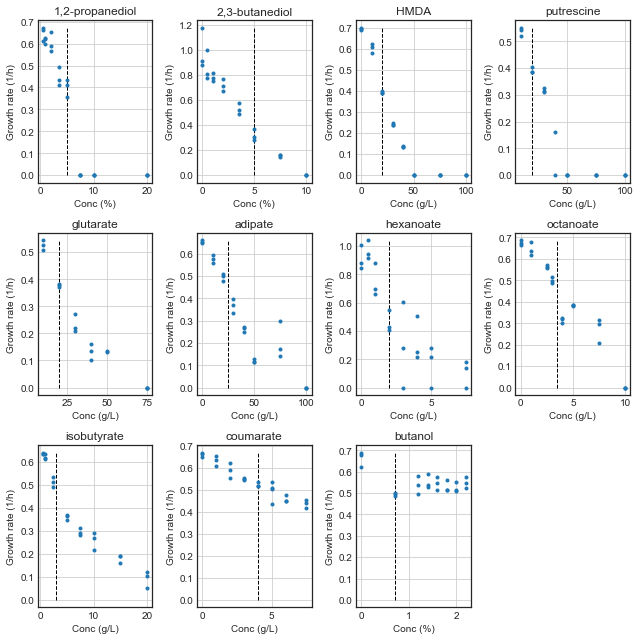

In [26]:
plt.style.use("seaborn-white")

comp_order = [
    "1,2-propanediol", "2,3-butanediol", "HMDA", "putrescine", "glutarate", "adipate", "hexanoate",
    "octanoate", "isobutyrate", "coumarate", "butanol"
]

initial_concentrations = {
    "butanol": 0.7,
    "glutarate": 20,
    "coumarate": 4,
    "putrescine": 20,
    "HMDA": 20,
    "adipate": 25,
    "isobutyrate": 3,
    "hexanoate": 2,
    "octanoate": 3.5,
    "2,3-butanediol": 5,
    "1,2-propanediol": 5
}

plt.figure(figsize=[9, 9])

for i, comp in enumerate(comp_order):
    plt.subplot(3, 4, i+1)
    comp_df = df[df["compound"] == comp]
    means = comp_df.groupby("conc").mean()["growth_rate"]
    if comp == "coumarate":
        comp_df = comp_df[comp_df["growth_rate"] > 0.4]
    if comp == "putrescine":
        comp_df = comp_df[~((comp_df["growth_rate"] > 0.45) & (comp_df["conc"] > 25))]
    if comp == "glutarate":
        comp_df = comp_df[~((comp_df["conc"] > 40) & (comp_df["growth_rate"] > 0.4))]
    stds = comp_df.groupby("conc").std()["growth_rate"]
    nums = comp_df.groupby("conc").count()["growth_rate"]
    #plt.errorbar(means.index, means.values, yerr=(stds / nums).values, fmt=".")
    max_growth = comp_df["growth_rate"].max()
    plt.plot([initial_concentrations[comp]]*2, [0, max_growth], "k--", linewidth=1)
    plt.plot(comp_df["conc"], comp_df["growth_rate"], ".")
    plt.title(comp)
    plt.xlabel("Conc ({})".format(comp_df["unit"].iloc[0]))
    plt.ylabel("Growth rate (1/h)")
    plt.grid()
    
plt.tight_layout()

plt.savefig("../Plots/Initial-tox.pdf")

## Osmolarity plots

In [27]:
final_concentrations = {
    '12PD':1.09081351,
    '23BD':0.876599239,
    'HMDA':0.653988469,
    'PUTR':0.862166761,
    'GLUT':1.078564941,
    'ADIP':1.026413029,
    'HEXA':0.129132231,
    'OCTA':0.138686638,
    'COUM':0.243664717,
    'IBUA':0.286993457,
    'BUT':0.218623482
}

In [28]:
final_concentrations.get

<function dict.get(key, default=None, /)>

In [30]:
glob_tol = pd.read_csv("../Data/Global_tolerance_dataframe.csv")
glob_tol["osmolarity"] = glob_tol["comp"].map(final_concentrations.get)

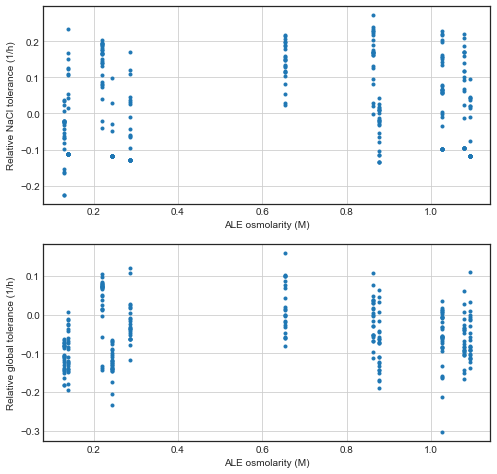

In [31]:
plt.figure(figsize=[8, 8])
plt.subplot(2, 1, 1)
plt.plot(glob_tol["osmolarity"], glob_tol["NaCl"], ".")
plt.xlabel("ALE osmolarity (M)")
plt.ylabel("Relative NaCl tolerance (1/h)")
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(glob_tol["osmolarity"], glob_tol["global"], ".")
plt.xlabel("ALE osmolarity (M)")
plt.ylabel("Relative global tolerance (1/h)")
plt.grid()

plt.savefig("../Plots/Osmolarity-figure.pdf")